In [1]:
# Load files from src
include("../src/Chebyshev.jl")
include("../src/Spheroidal.jl")
include("../src/SpectralRadialODE.jl")

import .Chebyshev as CH
import .Spheroidal as SH
import .SpectralRadialODE as RODE

# Load 3rd party packages
import Plots
import HDF5
import Polynomials: ChebyshevT
using Plots
using SpecialFunctions
using LinearAlgebra # nullspace
using GenericLinearAlgebra # for svd of bigfloat matrix
using SparseArrays

# use PyCall to load Leo's qnm code
# used in calculating the frequency and separation constant
# for overtones

# Will implement Leaver's method in julia one day
# to enable higher precision arithmetics!
# using PyCall
# @pyimport qnm

# Angular Spectrum

In [73]:
# input params for radial ode
T=BigFloat

s = -2;
l = 2;
m = 2;
n = 1;
a = T(1);
bhm = T(1);
nl = 20;
nomegas = 40;
omegas = LinRange(0.1, 1, nomegas);

In [95]:
la_s, v_s = SH.eig_vals_vecs(nl,0,s,m,1.0+0.5*im);
v_s[:, l-lmin+1]

20-element Vector{ComplexF64}:
      0.9780953235814469 + 0.0im
     0.18551761107262488 + 0.08848114989080111im
      0.0206963546260921 + 0.025268969945097842im
    0.000970735205586261 + 0.0039819645418582095im
   -8.884452671730712e-5 + 0.0004153089955903713im
  -2.3018866692751267e-5 + 2.9422892714337027e-5im
  -2.5667377872043716e-6 + 1.2463821376539898e-6im
   -1.923578274740094e-7 - 8.634432766824435e-10im
   -1.038639303168697e-8 - 5.172754446449033e-9im
 -3.8312671374566347e-10 - 5.038034474584384e-10im
   -5.97952204286126e-12 - 3.093326238169092e-11im
    3.83013969120121e-13 - 1.3899701300825087e-12im
   4.067324628704053e-14 - 4.5526341989312745e-14im
   2.232484656805037e-15 - 8.941561945842177e-16im
   8.827780635111723e-17 + 7.080786370962905e-18im
    2.62377426724143e-18 + 1.57748180238466e-18im
   5.364076404223456e-20 + 8.406228567208755e-20im
  3.2563489351244743e-22 + 3.0531539730325033e-21im
 -3.1211344947100127e-23 + 8.403216627817949e-23im
 -1.8147593308854394

In [96]:
la_s, v_s = SH.eig_vals_vecs(nl,0,s,m,-1.0+0.5*im);
v_s[:, l-lmin+1]

20-element Vector{ComplexF64}:
        0.98026532062792 + 0.0im
    -0.17837861720636433 + 0.07807134086249917im
     0.02087482267476615 - 0.026649962813215924im
  -0.0008623208457115531 + 0.004345066982201478im
 -0.00013355806352263007 - 0.00046274027393486845im
    2.982285589343084e-5 + 3.1970815319118365e-5im
  -3.2334234517547795e-6 - 1.176259113250298e-6im
   2.3549193160078376e-7 - 2.8248280867085538e-8im
  -1.2148996032268407e-8 + 8.099236818035735e-9im
  3.9917735434433685e-10 - 7.042417976110303e-10im
 -1.9827686499263224e-12 + 4.0846741404104366e-11im
  -7.687505964544257e-13 - 1.7315774513618674e-12im
   6.273633175519631e-14 + 5.143228087542296e-14im
  -3.148045040996419e-15 - 7.071278656288747e-16im
  1.1629345137916856e-16 - 2.904188531944704e-17im
 -3.1663930579709627e-18 + 2.721952260048933e-18im
  5.2765772945970464e-20 - 1.2639908968388013e-19im
   2.950358972353525e-22 + 4.233807102908513e-21im
  -6.349136772007179e-23 - 1.0724115846888504e-22im
  2.924198007844465

In [86]:
vss = Vector{Float64}()
lmin = max(abs(s),abs(m))
for omega in omegas
    la_s, v_s = SH.eig_vals_vecs(nl,0,s,m,(omega+0*im)*Float64(a));
    append!(vss, v_s[:, l-lmin+1])
end;

In [87]:
vss = reshape(vss,(nl,nomegas));

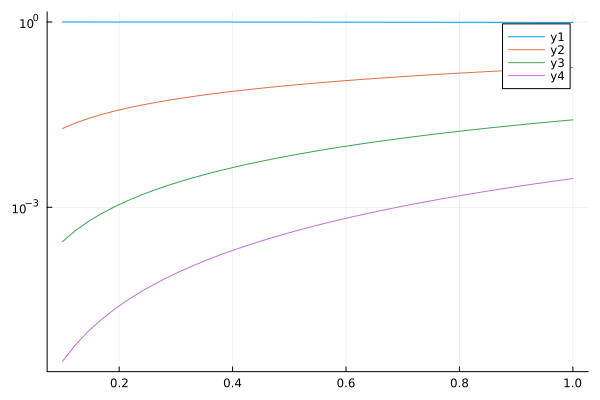

In [88]:
plot(omegas,[abs(v) for v in vss[1,:]],yaxis=:log)
plot!(omegas,[abs(v) for v in vss[2,:]])
plot!(omegas,[abs(v) for v in vss[3,:]])
plot!(omegas,[abs(v) for v in vss[4,:]])
